In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [122]:
import tensorflow as tf
import keras

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
data = pd.read_csv('/content/sample_data/happydata.csv')
data.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


<Axes: xlabel='happy'>

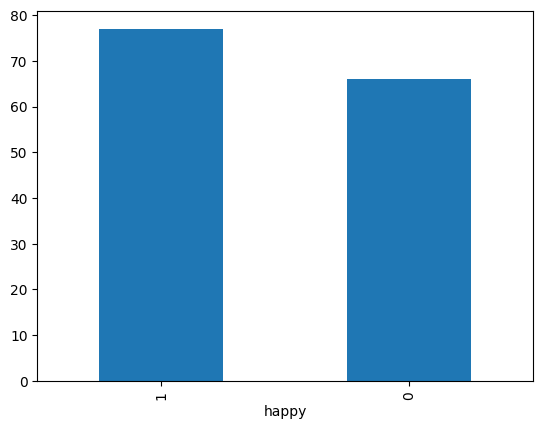

In [124]:
import seaborn as sns
data['happy'].value_counts().plot(kind = 'bar')

**Preparing data for modeling**

In [135]:
#split into input (X) and output (Y) variables
predictor = data.iloc[:,0:6]
response = data.iloc[:,6]

In [136]:
#create training and testing
X_train, X_test, y_train, y_test = train_test_split(predictor, response,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(114, 6) (114,)
(29, 6) (29,)


**Training the neural network model**

In [137]:
# Initialising the ANN
classifier = Sequential()

In [138]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, activation='relu',input_dim=6))


In [139]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [140]:
# compiling the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [141]:
#fitting the model
classifier.fit(X_train, y_train, batch_size= 20, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 1.1767 - accuracy: 0.4912
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.0202 - accuracy: 0.5088
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9003 - accuracy: 0.5088
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8274 - accuracy: 0.5263
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7824 - accuracy: 0.5175
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7543 - accuracy: 0.5088
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7469 - accuracy: 0.5526
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7458 - accuracy: 0.5877
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7461 - accuracy: 0.5877
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7446 - accuracy: 0.5877
Epoch 11/100
6/6 [===========

In [142]:
_, accuracy = classifier.evaluate(X_train,y_train)
print('Train accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.6404
Train accuracy: 64.04


In [143]:
# prompt: find out test accuracy

_, accuracy = classifier.evaluate(X_test,y_test)
print('Test accuracy: %.2f' % (accuracy*100))


1/1 [==============================] - 0s 26ms/step - loss: 0.7411 - accuracy: 0.4828
Test accuracy: 48.28


**ANN complex implementation**

In [144]:

class ANNModel:
    def __init__(self, input_shape, optimizer, checkpoint, early_stopping):       # Constructor
        self.input_shape = input_shape
        self.optimizer = optimizer
        self.checkpoint= checkpoint
        self.early_stopping= early_stopping
        self.model = self._build_model()

    def _build_model(self):                                            # special function
        model = Sequential()
        model.add(Dense(64, input_dim=self.input_shape, activation='relu'))  # 1st hidden layer with 64 nodes
        model.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 nodes
        model.add(Dense(16, activation='relu'))  # 3rd hidden layer with 16 nodes
        model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 node and sigmoid activation for binary classification
        return model

    def compile_model(self):
        self.model.compile(optimizer=self.optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    def train_model(self, X_train, y_train, epochs=10, batch_size=32, validation_data=None):
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_data=validation_data,
                                 callbacks=[checkpoint, early_stopping])



        return self.model, history

In [146]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Example usage
input_shape = 6  # Assuming 6 features

opt= keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False  )


early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",                               # watch validation loss
    min_delta=0,
    patience=2,                                       # patience:  number of epochs with no improvement after which training will be stopped
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

checkpoint= keras.callbacks.ModelCheckpoint(
    'my_model.h5',                            # a file will be saved in h5 format
    monitor="val_loss",
    verbose=0,
    save_best_only=True,                              # will save the model weights only when the val_loss  has improved from the previous best value
    save_weights_only=False,                           # only the weights of the model will be saved, rather than saving the entire model
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)


# Create ANN model object
ann_model = ANNModel(input_shape= input_shape, optimizer= opt,checkpoint= checkpoint, early_stopping=early_stopping)

# Compile the model
ann_model.compile_model()

# Train the model
trained_model, history = ann_model.train_model(X_train, y_train, epochs=5, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/5
6/6 [==============================] - 1s 57ms/step - loss: 1.0133 - accuracy: 0.4737 - val_loss: 0.8495 - val_accuracy: 0.4138
Epoch 2/5
6/6 [==============================] - 0s 13ms/step - loss: 0.7320 - accuracy: 0.4737 - val_loss: 0.6848 - val_accuracy: 0.5862
Epoch 3/5
6/6 [==============================] - 0s 14ms/step - loss: 0.6879 - accuracy: 0.5263 - val_loss: 0.6573 - val_accuracy: 0.5862
Epoch 4/5
1/6 [====>.........................] - ETA: 0s - loss: 0.7414 - accuracy: 0.4000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 17ms/step - loss: 0.7004 - accuracy: 0.5263 - val_loss: 0.6550 - val_accuracy: 0.5862
Epoch 5/5
6/6 [==============================] - 0s 9ms/step - loss: 0.6965 - accuracy: 0.5263 - val_loss: 0.6554 - val_accuracy: 0.5862


In [100]:
# Save the model to a file
trained_model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
from google.colab import files
uploaded = files.upload()

Saving my_model.h5 to my_model (2).h5


In [147]:
file_path= '/content/my_model.h5'            # same as a csv file path. Copy the file path

loaded_model= keras.saving.load_model(file_path, custom_objects=None, compile=True, safe_mode=True)

In [148]:
loaded_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                448       
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
